# Predicting House Sale Prices

## Objective

Building and Improving Linear Regression models

    -- Exploratory Data Analysis (EDA) with Visualization
    -- Feature Extraction
    -- Data Modelling
    -- Model Evaluation

## Data Set

The dataset come from [Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

| File Name             | Description                                                                                                                 |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| train.csv             | the training set                                                                                                            |
| test.csv              | the test set                                                                                                                |
| data_description.txt  | full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here |
| sample_submission.csv | a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms       |

Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


## Import Modules/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats

## Load train and test dataset

In [2]:
train = pd.read_csv('C:/Users/i7/csv/house/train.csv')
test = pd.read_csv('C:/Users/i7/csv/house/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

Target variable **SalePrice** is more in train dataset. It's not present in test dataset. We have to predict SalePrice for test dataset.

In [6]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Correlation of Features with Target Variable

In [9]:
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Most features (OverallQual, GrLivArea, GarageCars, etc.) have positive correlation with the target variable SalePrice but some features (BsmtFinSF2, BsmtHalfBath, YrSold, etc.) have negative correlation as well.

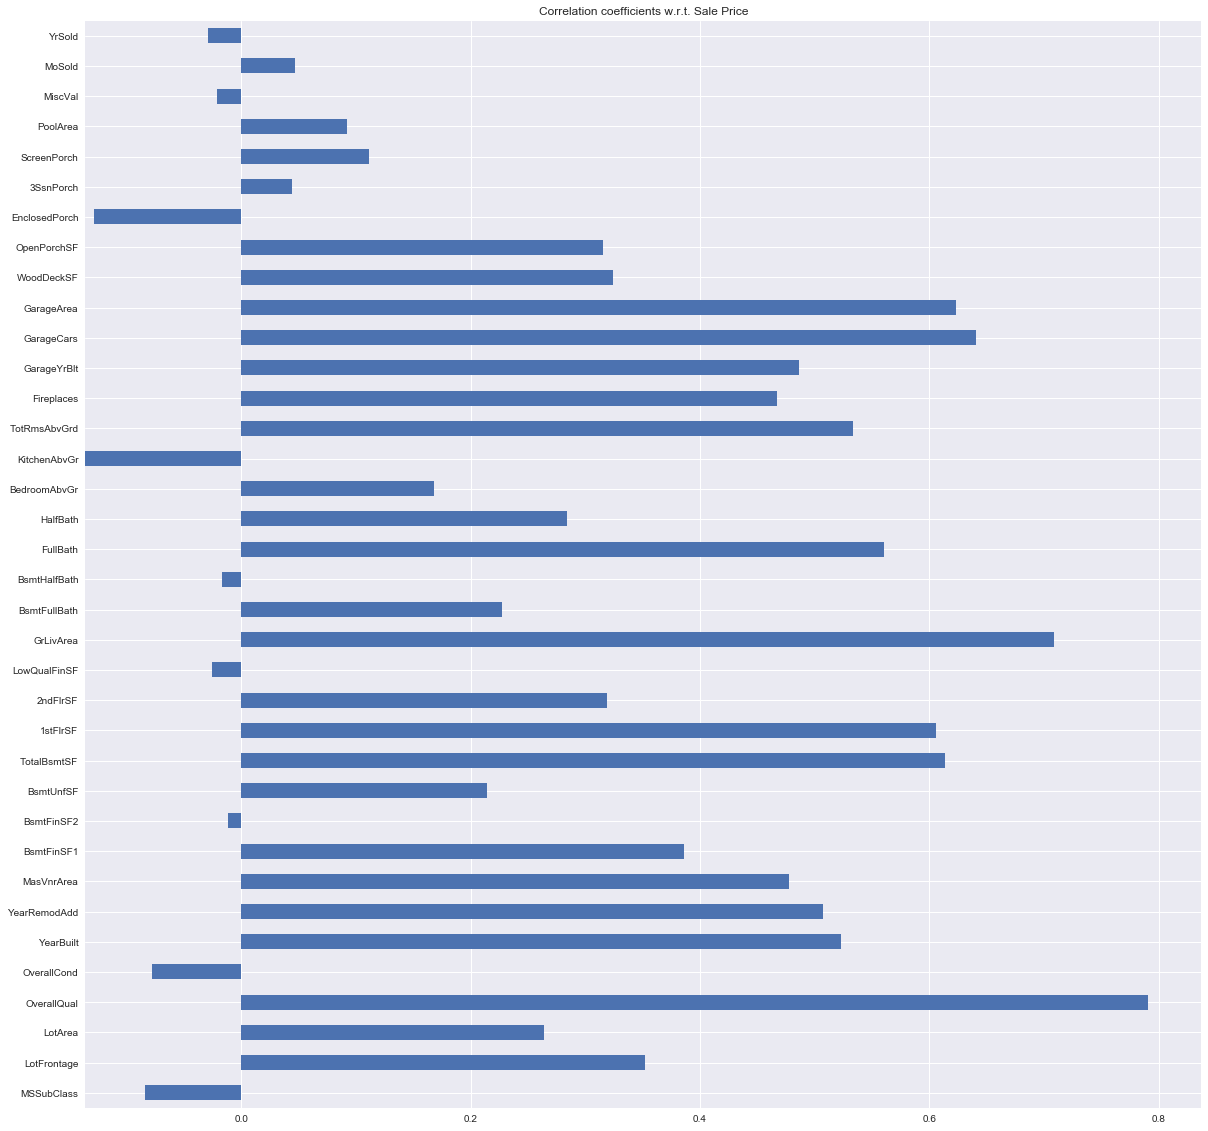

In [10]:
plt.figure(figsize=(20,20))
corr = corr[1:-1] # removing 1st (SalePrice) and last (Id) row from dataframe
corr.plot(kind='barh') # using pandas plot
plt.title('Correlation coefficients w.r.t. Sale Price')

###  Heatmap of highly correlated features with respect to SalePrice

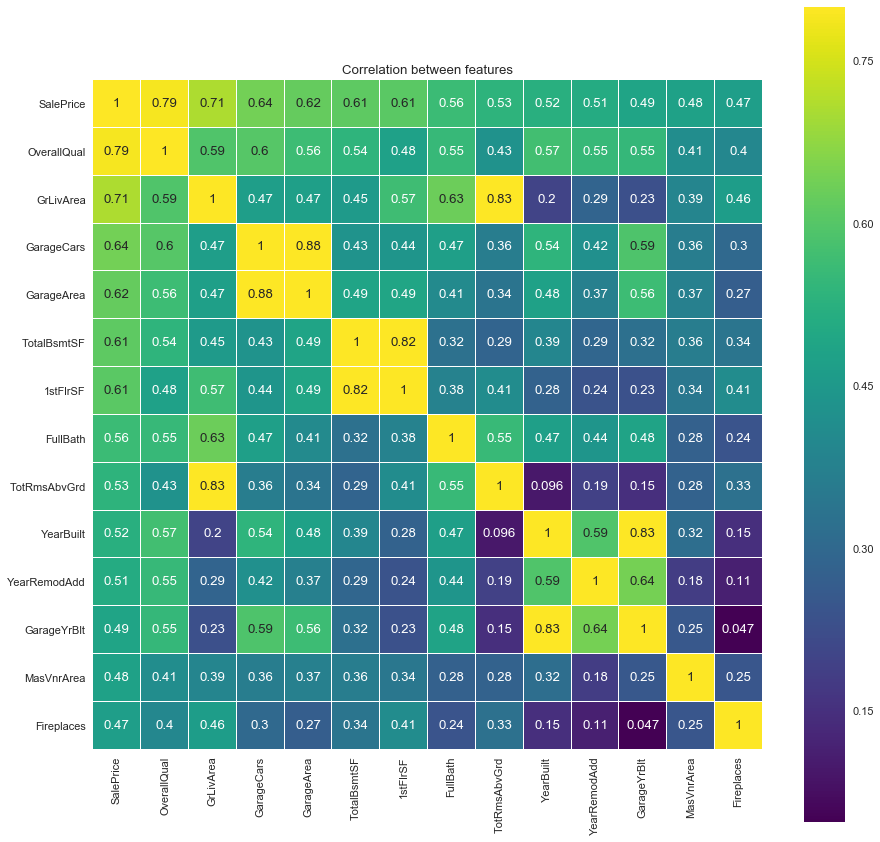

In [11]:
# taking high correlated variables having positive correlation of 45% and above
high_positive_correlated_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                               'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
                               'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

corrMatrix = train[high_positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

#### Based on the heatmap above:

It appears that some features (other than our target variable SalePrice) are highly correlated among themselves. Note the yellow blocks in the above heatmap. The following features are intercorrelated:

    TotRmsAbvGrd & GrLivArea = 0.83
    GarageYrBlt & YearBuilt = 0.83
    1stFlrSF & TotalBsmtSF = 0.82
    GarageArea & GarageCars = 0.88
    SalePrice & OverallQual = 0.79

This type of scenario results in multicollinearity. Multicollinearity occurs when there is moderate or high intercorrelation between independent variables. This can result in high standard error.

There are different ways to reduce multicollinearity like:

    -- Removing the interrelated features
    -- Creating a new feature by combining the interrelated features.

### Scatter Plot

draw a scatter plot between SalePrice and some of the high correlated variables having positive correlation with respect to SalePrice. Take the following independent variables:

    OverallQual
    TotRmsAbvGrd and GrLivArea are correlated as stated above with 83%. Hence, only take GrLivArea because it has higher correlation with SalePrice as compared to TotalRmsAbvGrid.
    GarageArea and GarageCars are correlated as stated above with 88%. Hence, only take GarageCars because it has a bit higher correlation with SalePrice as compared to GarageArea.
    1stFlrSF and TotalBsmtSF are correlated with 82%. Keep TotalBsmtSF because it has a bit higher correlation with SalePrice as compared to 1stFlrSF.
    GarageYrBlt and YearBuilt are correlated as stated above with 83%. Keep YearBuilt because it has higher correlation with SalePrice as compared to GarageYrBlt.

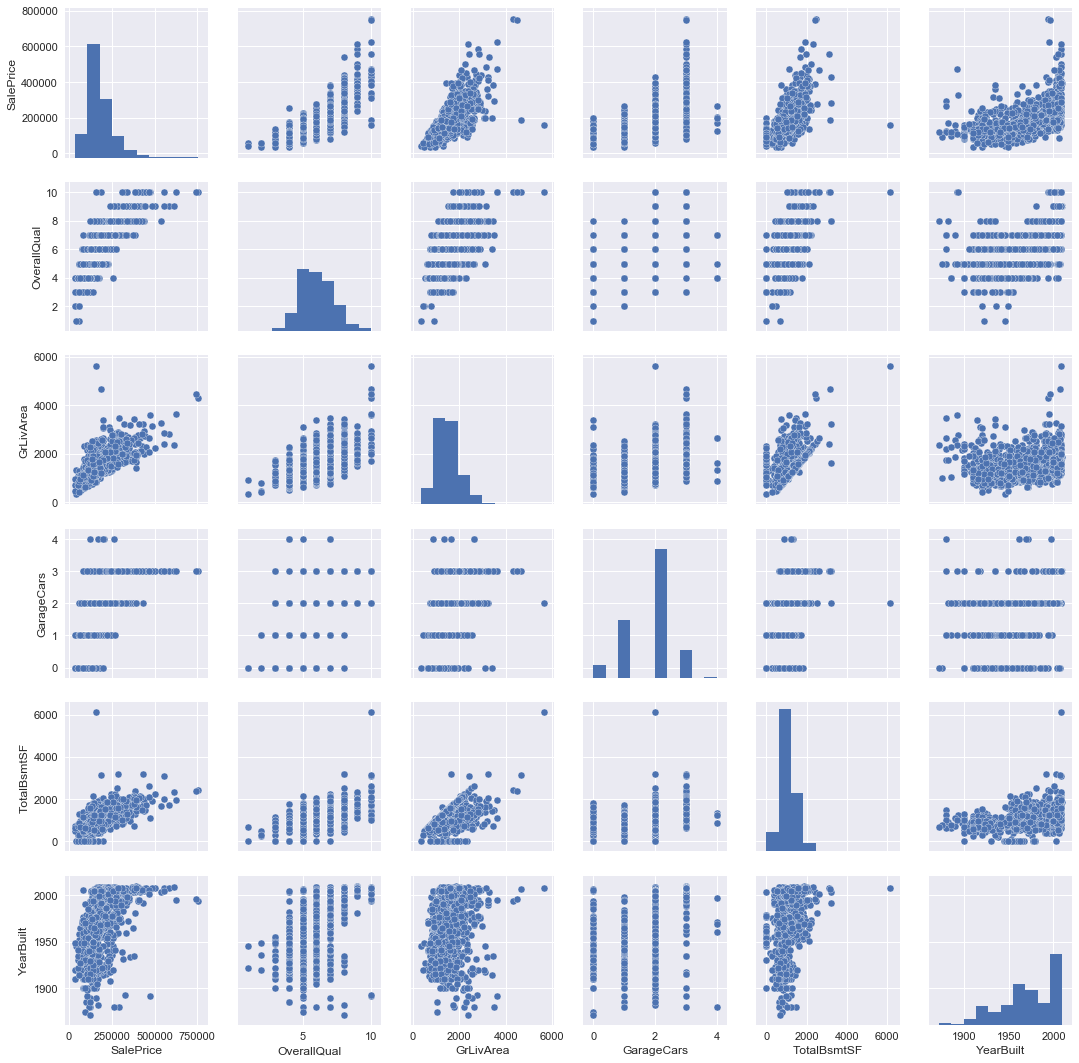

In [12]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)

From above scatter plot, we can see that:

    GrLivArea and TotalBsmtSF are linearly related with SalePrice. The variables are positively related. When value of GrLivArea or TotalBsmtSF increases then SalePrice increases.
    OverallQual and YearBuilt are also positively related with SalePrice.

Draw a box plot of OverallQual with respect to SalePrice.

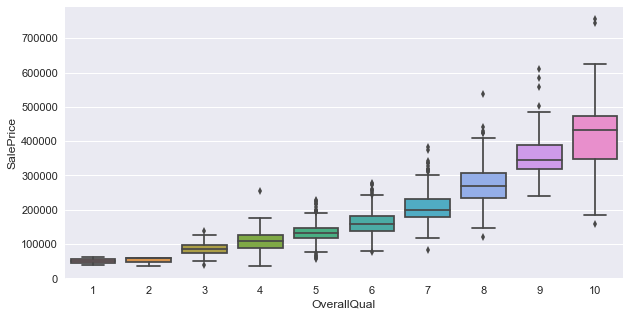

In [13]:
# box plot overallqual/saleprice
plt.figure(figsize=[10,5])
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

## UNIVARIATE ANALYSIS

Analyze Skewness and Kurtosis of SalePrice.

In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

F:\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


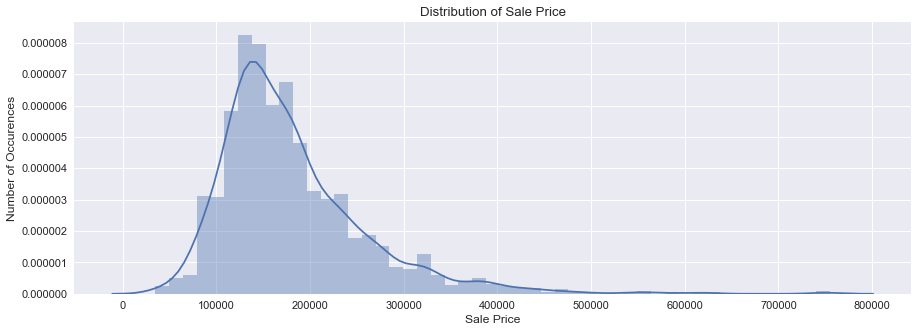

In [15]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.164745194154, 180921.19589041095, 0.93196656415129864))

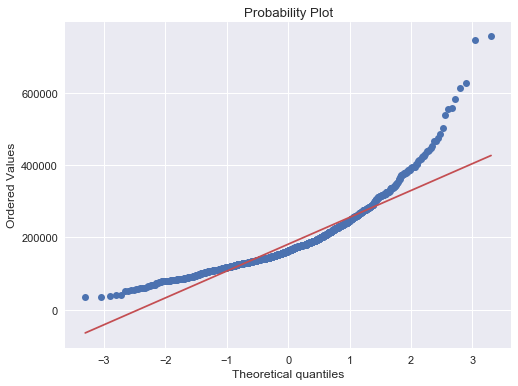

In [16]:
# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [17]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


From the above computation and also from the above histogram, it can say that SalePrice:

    is positively skewed or right skewed
    have high kurtosis
    
High Kurtosis means that SalePrice has some outliners. Remove them so that they don't affect the prediction result.

### Removing Outliers

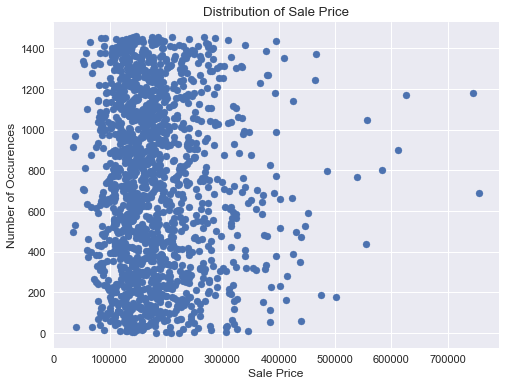

In [18]:
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

In [19]:
# removing outliers
upperlimit = np.percentile(train.SalePrice.values, 99.5)
train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit # slicing dataframe upto the uppperlimit

F:\ANACONDA\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


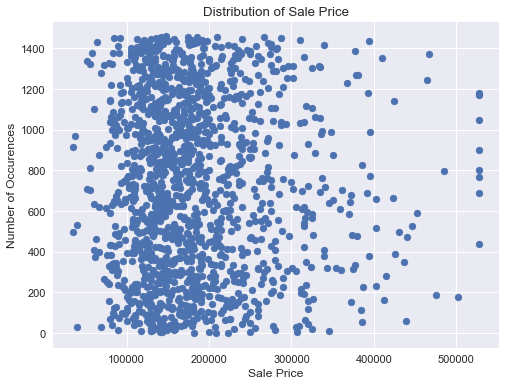

In [20]:
# plotting again the graph after removing outliers
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

### Reducing skewness by using Log Transformation

In [21]:
# applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

F:\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.17558545,
          13.17558545,  13.17558545])),
 (0.39568317766527117, 12.023196041130895, 0.99577753714413475))

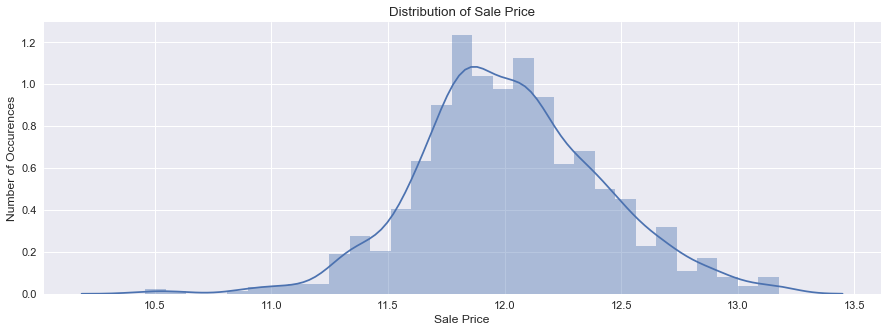

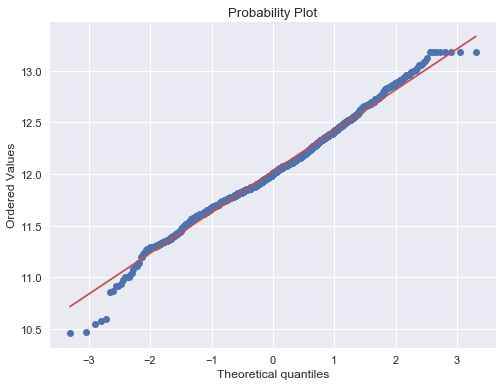

In [22]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [23]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.062732
Kurtosis: 0.622026


##### Data distribution of SalePrice has been changed from right skewed to normal.

## MULTIVARIATE ANALYSIS

#### GrLivArea vs SalePrice

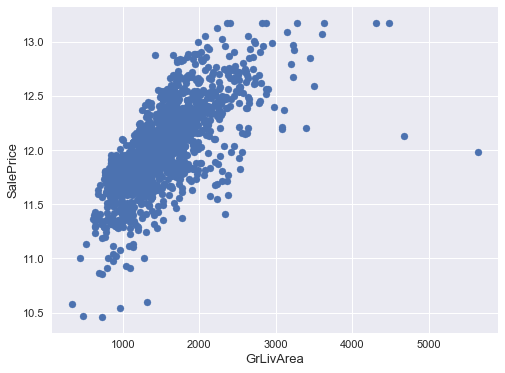

In [24]:
# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

#### Remove these Outliers

In [25]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

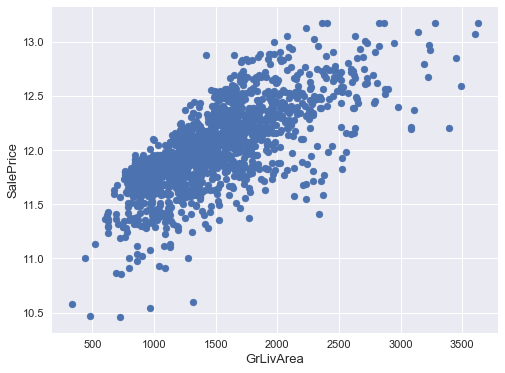

In [26]:
# Plot the graph again

# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

Outliers can be present in other variables as well. But, removing outliers from all other variables may adversly affect the model because there can be outliers in test dataset as well.

## Getting Missing Values

Concatenate train and test dataset into a single dataframe named all_data.

In [27]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2915, 80)

List variables with missing data with total number of missing rows along with the missing percentage.

In [28]:
null_columns = all_data.columns[all_data.isnull().any()]
total_null_columns = all_data[null_columns].isnull().sum()
percent_null_columns = ( all_data[null_columns].isnull().sum() / all_data[null_columns].isnull().count() )
missing_data = pd.concat([total_null_columns, percent_null_columns], axis=1, keys=['Total', 'Percent']).sort_values(by=['Percent'], ascending=False)
missing_data

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


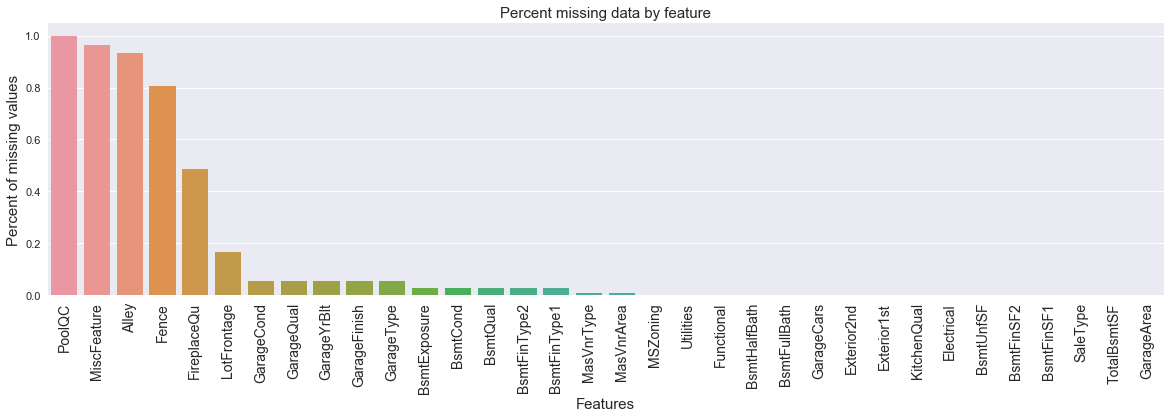

In [29]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90', fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data.Percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Imputing Missing Values

Replacing missing data with substituted values.

**PoolQC**

+99% values are missing for PoolQC. This means majority of houses have "no Pool" in them. Replace NULL values with "None".

In [30]:
# get unique values of the column data
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [31]:
# replace null values with 'None'
all_data['PoolQC'].fillna('None', inplace=True)

In [32]:
# get unique values of the column data
all_data['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

**MiscFeature**

+96% values are missing for MiscFeature. Null value or NA means "no misc feature" in the house.

In [33]:
# get unique values of the column data
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [34]:
# replace null values with 'None'
all_data['MiscFeature'].fillna('None', inplace=True)

**Alley**

+93% values are missing for Alley. Null value or NA means "no alley access" in the house.

In [35]:
# get unique values of the column data
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [36]:
# replace null values with 'None'
all_data['Alley'].fillna('None', inplace=True)

**Fence**

+80% values are missing for Fence. Null value or NA means "no fence" in the house.

In [37]:
# get unique values of the column data
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [38]:
# replace null values with 'None'
all_data['Fence'].fillna('None', inplace=True)

**FireplaceQu**

+48% values are missing for FireplaceQu. Null value or NA means "no fireplace" in the house.

In [39]:
# get unique values of the column data
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [40]:
# replace null values with 'None'
all_data['FireplaceQu'].fillna('None', inplace=True)

**LotFrontage**

LotFrontage: Linear feet of street connected to property

16.67% values are missing for LotFrontage. Assume that the distance of the street connected to the property (LotFrontage) will be same as that of that particular property's neighbor property (Neighborhood).

Fill the missing value by the median LotFrontage of all the Neighborhood.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

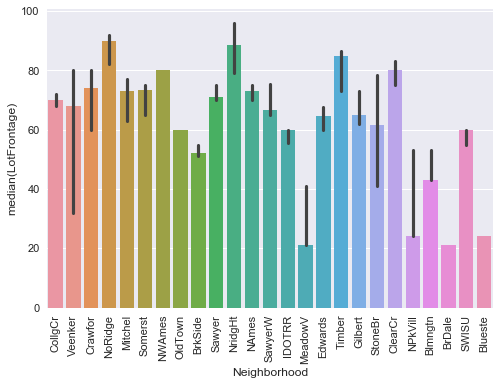

In [41]:
# barplot of median of LotFrontage with respect to Neighborhood
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)

In [42]:
# get unique values of the column data
all_data['LotFrontage'].unique()

array([  65.,   80.,   68.,   60.,   84.,   85.,   75.,   nan,   51.,
         50.,   70.,   91.,   72.,   66.,  101.,   57.,   44.,  110.,
         98.,   47.,  108.,  112.,   74.,  115.,   61.,   48.,   33.,
         52.,  100.,   24.,   89.,   63.,   76.,   81.,   95.,   69.,
         21.,   32.,   78.,  121.,  122.,   40.,  105.,   73.,   77.,
         64.,   94.,   34.,   90.,   55.,   88.,   82.,   71.,  120.,
        107.,   92.,  134.,   62.,   86.,  141.,   97.,   54.,   41.,
         79.,  174.,   99.,   67.,   83.,   43.,  103.,   93.,   30.,
        129.,  140.,   35.,   37.,  118.,   87.,  116.,  150.,  111.,
         49.,   96.,   59.,   36.,   56.,  102.,   58.,   38.,  109.,
        130.,   53.,  137.,   45.,  106.,   42.,   39.,  104.,  144.,
        114.,  128.,  149.,  313.,  168.,  182.,  138.,  152.,  124.,
        153.,   46.,   26.,   25.,  119.,   31.,   28.,  117.,  113.,
        125.,  135.,  136.,   22.,  123.,  160.,  195.,  155.,  126.,
        200.,  131.,

In [43]:
# replace null values with median LotFrontage of all the Neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [44]:
all_data['LotFrontage'].unique()

array([  65. ,   80. ,   68. ,   60. ,   84. ,   85. ,   75. ,   51. ,
         50. ,   70. ,   72. ,   91. ,   73. ,   66. ,  101. ,   57. ,
         44. ,  110. ,   98. ,   47. ,  108. ,  112. ,   74. ,  115. ,
         67. ,   61. ,   48. ,   33. ,   64. ,   52. ,  100. ,   24. ,
         89. ,   63. ,   76. ,   81. ,   95. ,   69. ,   21. ,   32. ,
         78. ,  121. ,  122. ,   40. ,  105. ,   77. ,   94. ,   34. ,
         90. ,   80.5,   55. ,   88. ,   82. ,   71. ,  120. ,  107. ,
         92. ,  134. ,   62. ,   86. ,  141. ,   97. ,   72.5,   54. ,
         41. ,   79. ,  174. ,   99. ,   83. ,   43. ,  103. ,   93. ,
         30. ,   64.5,  129. ,  140. ,   35. ,   37. ,  118. ,   87. ,
        116. ,  150. ,  111. ,   49. ,   96. ,   59. ,   36. ,   56. ,
        102. ,   58. ,   38. ,  109. ,  130. ,   53. ,  137. ,   88.5,
         45. ,  106. ,   42. ,   39. ,  104. ,  144. ,  114. ,  128. ,
        149. ,  313. ,  168. ,  182. ,  138. ,  152. ,  124. ,  153. ,
      

**GarageType, GarageFinish, GarageQual and GarageCond**

These are categorical (nominal) variables related to Garage. Replace their missing values with "None". None means no Garage in the house.

In [45]:
# get unique values of the column data
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print (all_data[col].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [46]:
# replace null values with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna('None', inplace=True)

**GarageYrBlt, GarageArea and GarageCars**

These are ordinal/numeric variables related to Garage. Replace their missing values with "0" (zero). Zero means no Garage in the house, so no Cars in Garage.

In [47]:
# get unique values of the column data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    print (all_data[col].unique())

[ 2003.  1976.  2001.  1998.  2000.  1993.  2004.  1973.  1931.  1939.
  1965.  2005.  1962.  2006.  1960.  1991.  1970.  1967.  1958.  1930.
  2002.  1968.  2007.  2008.  1957.  1920.  1966.  1959.  1995.  1954.
  1953.    nan  1983.  1977.  1997.  1985.  1963.  1981.  1964.  1999.
  1935.  1990.  1945.  1987.  1989.  1915.  1956.  1948.  1974.  2009.
  1950.  1961.  1921.  1900.  1979.  1951.  1969.  1936.  1975.  1971.
  1923.  1984.  1926.  1955.  1986.  1988.  1916.  1932.  1972.  1918.
  1980.  1924.  1996.  1940.  1949.  1994.  1910.  1978.  1982.  1992.
  1925.  1941.  2010.  1927.  1947.  1937.  1942.  1938.  1952.  1928.
  1922.  1934.  1906.  1914.  1946.  1908.  1929.  1933.  1917.  1896.
  1895.  2207.  1943.  1919.]
[  548.   460.   608.   642.   836.   480.   636.   484.   468.   205.
   384.   736.   352.   840.   576.   516.   294.   853.   280.   534.
   572.   270.   890.   772.   319.   240.   250.   271.   447.   556.
   691.   672.   498.   246.     0.   440.   30

In [48]:
# replace null values with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col].fillna(0, inplace=True)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2**

These are categorical (nominal) variables related to Basement. Replace their missing values with "None". None means no Basement in the house.

In [49]:
# get unique values of the column data
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print (all_data[col].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [50]:
# replace null values with 'None'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None', inplace=True)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath**

These are ordinal/numeric variables related to Basement. Replace their missing values with "0" (zero). Zero means no Basement in the house.

In [51]:
# replace null values with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

**MasVnrArea, MasVnrType**

NA for MasVnrArea and MasVnrType means there is "no masonry veneer" for the house. Replace the NA value of nominal/categorical feature MasVnrType with "None" and the NA value of ordinal feature MasVnrArea with 0 (zero).

In [52]:
all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)

**MSZoning, Utilities, Functional, Exterior2nd, Exterior1st, KitchenQual, Electrical, SaleType**

All of these features are nominal/categorical. Each of them has less than 5 missing values. Replace the missing values of each feature by the most common value for that particular feature.

In [53]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

## Recheck Columns for Missing Values

In [54]:
null_columns = all_data.columns[all_data.isnull().any()]
print (null_columns)

Index([], dtype='object')


There are no columns with missing values.

## Reducing Skewness of Predictors (Independent Variables)

In [55]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
#print (numeric_features)

skewness = []
for col in numeric_features:
    skewness.append( (col, all_data[col].skew()) )
    
pd.DataFrame(skewness, columns=('Feature', 'Skewness')).sort_values(by='Skewness', ascending=False)

,Feature,Skewness
24,MiscVal,21.943440
29,PoolArea,18.711459
19,LotArea,13.130516
21,LowQualFinSF,12.086535
2,3SsnPorch,11.373947
18,KitchenAbvGr,4.301059
5,BsmtFinSF2,4.144996
9,EnclosedPorch,4.002856
30,ScreenPorch,3.945539
7,BsmtHalfBath,3.944922


### Unskewing Data

Use Log Transformation to reduce the Skewness of the positively skewed features.

In [56]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew()) > 1]

# applying log transformation
for col in positively_skewed_features:
    all_data[col] = np.log(np.ma.array(all_data[col], mask=(all_data[col]<=0))) # using masked array to ignore log transformation of 0 values as (log 0) is undefined

F:\ANACONDA\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


## Dummy Categorical Features

Use to convert categorical/nominal features into quantitative one. A new column is created for each unique category of a nominal/categorical column. Values in that newly created column will be either 1 or 0.

In [57]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 302)


## Getting new Train and Test dataset

In [58]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [59]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1.0,3,706.0,1.0,1.0,1.0,150.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1.0,3,978.0,1.0,0.0,0.0,284.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1.0,3,486.0,1.0,1.0,1.0,434.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1.0,3,216.0,1.0,1.0,1.0,540.0,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1.0,4,655.0,1.0,1.0,1.0,490.0,1.000000,...,0,0,0,0,0,1,0,1,1,0


In [60]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1456,6.797940,0,1.0,2,468.0,4.969813,0.0,1.0,270.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1457,7.192182,0,1.0,3,923.0,1.000000,0.0,1.0,406.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1458,6.833032,701,1.0,3,791.0,1.000000,0.0,1.0,137.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1459,6.830874,678,1.0,3,602.0,1.000000,0.0,1.0,324.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1460,7.154615,0,1.0,2,263.0,1.000000,0.0,1.0,1017.0,1.0,...,0,0,0,0,0,1,0,1,1,0


## Modelling

In [61]:
# importing model libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Defining train and test data to train model

In [62]:
X_train = train.drop(['Id'], axis=1)
X_test = test.drop(['Id'], axis=1)

## Cross Validation

#### Lasso Regression

In [63]:
#lasso = Lasso(alpha =0.0005, random_state=1)
#lasso = Lasso()
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))

# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.10605609  0.11134129  0.11972374  0.10013615  0.10878121]
SCORE (mean: 0.109208 , std: 0.006443)


### Generate Predictions

In [64]:
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

#### Generating Prediction on Training data

In [65]:
dict_models = {'lasso':model_lasso}

pred_train = model_lasso.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, pred_train))
print ("%s: %f" % ('lasso', rmse))

lasso: 0.098365


#### Generate Predictions on Test dataset

In [66]:
prediction_lasso = np.expm1(model_lasso.predict(X_test))

In [70]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": prediction_lasso
    })